# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

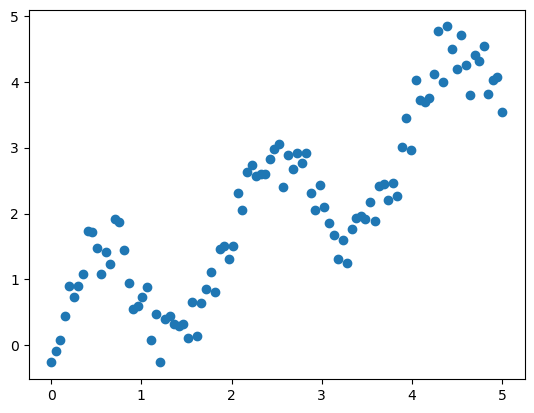

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5207093582512978


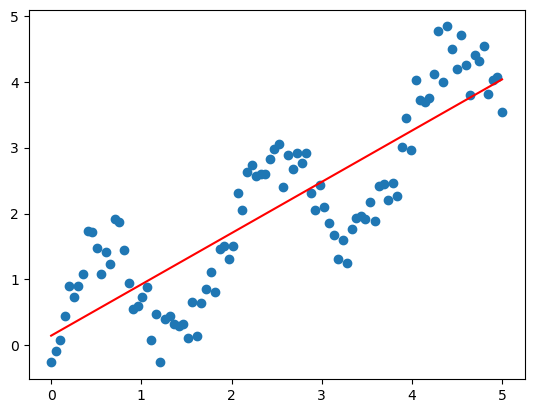

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

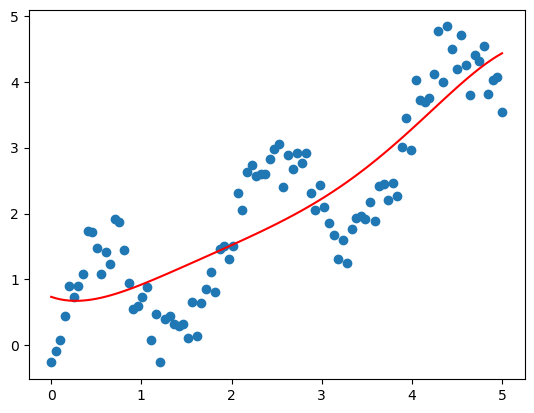

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.47790452  1.06410978 -0.50469649  0.11298015 -0.00897417]
interception:  0.736620186458468


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.73662019, 0.7151336 , 0.69869568, 0.68694235, 0.67952644,
       0.67611739, 0.67640086, 0.68007835, 0.68686694, 0.69649881,
       0.708721  , 0.72329498, 0.73999634, 0.75861441, 0.77895191,
       0.80082461, 0.82406098, 0.84850181, 0.87399986, 0.90041953,
       0.9276365 , 0.95553735, 0.98401924, 1.01298953, 1.04236545,
       1.07207371, 1.1020502 , 1.13223957, 1.16259495, 1.19307753,
       1.22365624, 1.25430739, 1.28501433, 1.31576705, 1.3465619 ,
       1.37740115, 1.40829272, 1.43924976, 1.47029033, 1.50143705,
       1.53271673, 1.56415999, 1.595801  , 1.627677  , 1.65982804,
       1.6922966 , 1.72512723, 1.75836618, 1.79206108, 1.82626056,
       1.86101393, 1.89637076, 1.93238061, 1.96909261, 2.00655514,
       2.04481546, 2.08391938, 2.12391087, 2.16483173, 2.20672123,
       2.24961577, 2.29354851, 2.33854899, 2.38464285, 2.43185141,
       2.48019133, 2.52967429, 2.58030657, 2.63208879, 2.68501546,
       2.73907467, 2.79424777, 2.85050894, 2.90782491, 2.96615

In [15]:
regr_poly.predict(X_poly)

array([0.73662019, 0.7151336 , 0.69869568, 0.68694235, 0.67952644,
       0.67611739, 0.67640086, 0.68007835, 0.68686694, 0.69649881,
       0.708721  , 0.72329498, 0.73999634, 0.75861441, 0.77895191,
       0.80082461, 0.82406098, 0.84850181, 0.87399986, 0.90041953,
       0.9276365 , 0.95553735, 0.98401924, 1.01298953, 1.04236545,
       1.07207371, 1.1020502 , 1.13223957, 1.16259495, 1.19307753,
       1.22365624, 1.25430739, 1.28501433, 1.31576705, 1.3465619 ,
       1.37740115, 1.40829272, 1.43924976, 1.47029033, 1.50143705,
       1.53271673, 1.56415999, 1.595801  , 1.627677  , 1.65982804,
       1.6922966 , 1.72512723, 1.75836618, 1.79206108, 1.82626056,
       1.86101393, 1.89637076, 1.93238061, 1.96909261, 2.00655514,
       2.04481546, 2.08391938, 2.12391087, 2.16483173, 2.20672123,
       2.24961577, 2.29354851, 2.33854899, 2.38464285, 2.43185141,
       2.48019133, 2.52967429, 2.58030657, 2.63208879, 2.68501546,
       2.73907467, 2.79424777, 2.85050894, 2.90782491, 2.96615

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

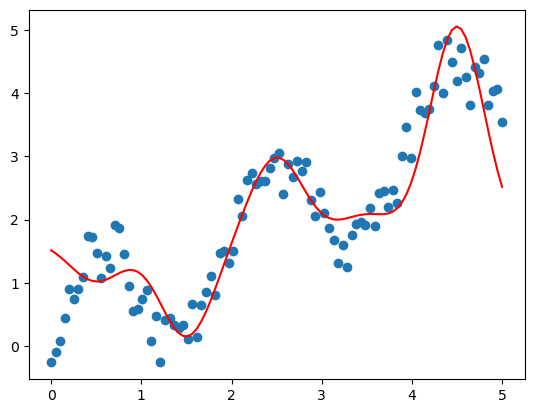

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.6491748  -1.52715837  1.30783744  0.39166016  3.37466408]
interception:  1.6758587187098175


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

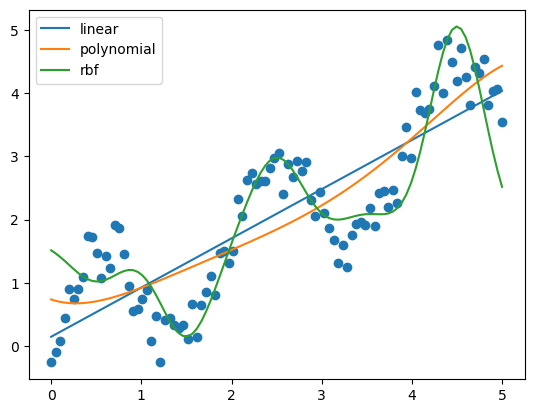

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5207093582512978


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.46931583763134527


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2898895735438322
